<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/ISOMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing ISOMap

Dataset Used: Google Ad Costs Dataset On Kaggle

#### 1. Introduction to ISOMAP
- ISOMAP is a non-linear dimensionality reduction method. It's especially useful for datasets where linear techniques like PCA might not capture the intrinsic geometry of the data.
- The method works by preserving the geodesic distances between points, which is crucial in capturing non-linear relationships.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
    # upload the file
uploaded = files.upload()

Saving Google_Costs.zip to Google_Costs.zip


## Next Steps in Data Preparation:
1. Data Cleaning: Convert 'CPC' to a numerical format, handle any missing or inconsistent data, and normalize if necessary.
2. Data Inspection: Further inspect the data to understand the distribution of values, identify outliers, and assess the need for normalization or scaling.

In [ ]:
# Importing necessary libraries and re-loading the dataset due to session reset

import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Path to the extracted dataset
extract_folder = '/content'
file_path = os.path.join(extract_folder, 'ubersuggest_google.csv')

# Loading the dataset
google_ads_data = pd.read_csv(file_path)

# Reapplying the data cleaning steps
# Converting 'CPC' to a numerical format
google_ads_data['CPC'] = google_ads_data['CPC'].replace('[\$,]', '', regex=True).astype(float)

# Checking for missing values and inconsistencies is not necessary as it was done before
# Directly moving to scaling the data using Robust Scaler

# Selecting numerical columns for scaling
numerical_columns = ['Search Volume', 'CPC', 'Paid Difficulty', 'Search Difficulty']
numerical_data = google_ads_data[numerical_columns]

# Applying Robust Scaler to the dataset
scaler = RobustScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_google_ads_data = pd.DataFrame(scaled_data, columns=numerical_columns)

# Displaying the first few rows of the scaled data to confirm successful processing
scaled_google_ads_data.head()


,Search Volume,CPC,Paid Difficulty,Search Difficulty
0,113.074770,0.266940,-0.210526,3.25
1,50.391260,-0.036961,-0.210526,0.00
2,33.593718,-0.636550,0.000000,0.25
3,33.593718,-0.225873,-0.210526,0.00
4,27.448276,-0.225873,-0.210526,0.00




### Proceeding with ISOMap:
1. **Parameter Selection:** Choose the number of components (dimensions) to reduce to and the number of neighbors.
2. **Applying ISOMap:** Implement ISOMap on the scaled dataset.
3. **Visualization:** Visualize the results to understand the dimensional reduction effect.


In [ ]:
from sklearn.manifold import Isomap

# Parameter Selection for ISOMap
n_components = 2  # Reducing to 2 dimensions for easy visualization
n_neighbors = 5   # Number of neighbors to consider

# Applying ISOMap
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
reduced_data = isomap.fit_transform(scaled_google_ads_data)

# Creating a DataFrame for the reduced data for visualization
reduced_data_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])

reduced_data_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


,Component 1,Component 2
0,111.680121,-2.419615
1,48.837802,-1.254748
2,32.023964,-0.944643
3,32.017788,-0.945857
4,25.864306,-0.832881


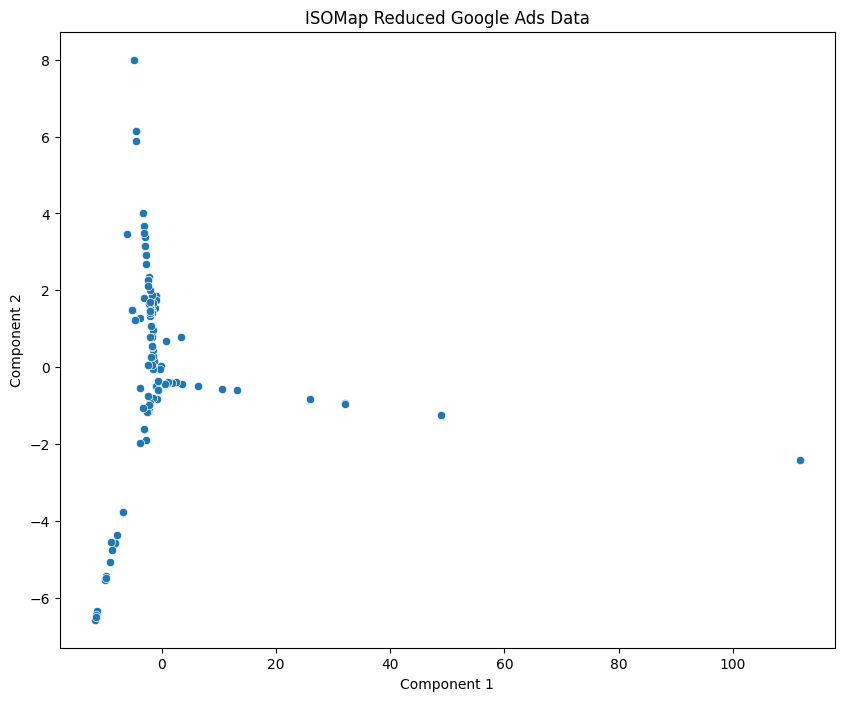

In [ ]:
# Visualizing the reduced data using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', data=reduced_data_df)
plt.title('ISOMap Reduced Google Ads Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


### Analyzing Clusters in the Reduced Data

To analyze potential clusters within the ISOMap-reduced data, we can employ clustering algorithms. Clustering will help us identify groups of keywords with similar characteristics. For this purpose, K-Means clustering is a commonly used and effective method.

#### Steps for Cluster Analysis:
1. **K-Means Clustering:** Apply K-Means to identify clusters within the reduced data.
2. **Determine Optimal Number of Clusters:** Use methods like the Elbow Method to find the optimal number of clusters.
3. **Visualization of Clusters:** Visualize the clusters to understand their distribution and characteristics.
4. **Cluster Interpretation:** Analyze each cluster to infer characteristics and patterns.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

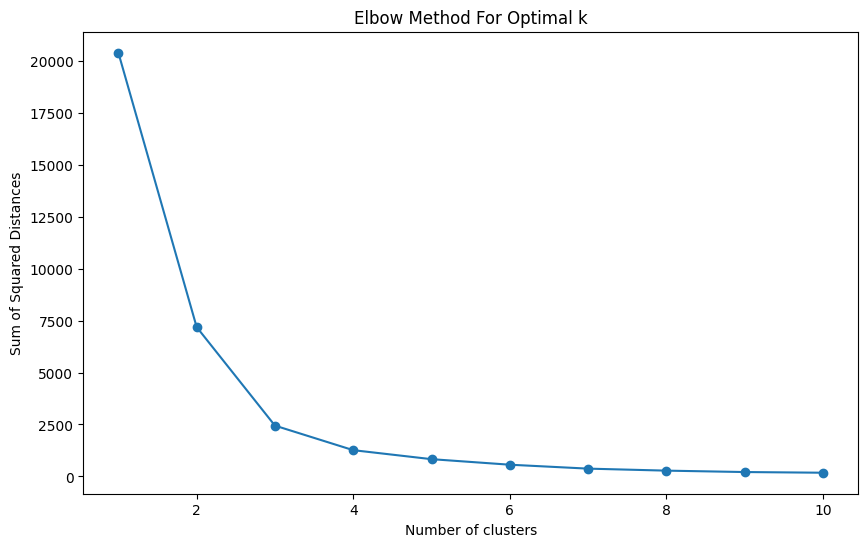

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Function to calculate the Sum of Squared Distances (SSD) for different numbers of clusters
def calculate_ssd(data, k_range):
    ssd = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        ssd.append(kmeans.inertia_)
    return ssd

# Range of K (number of clusters) we want to try
k_range = range(1, 11)

# Calculate SSD for each K
ssd = calculate_ssd(reduced_data, k_range)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, ssd, 'o-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


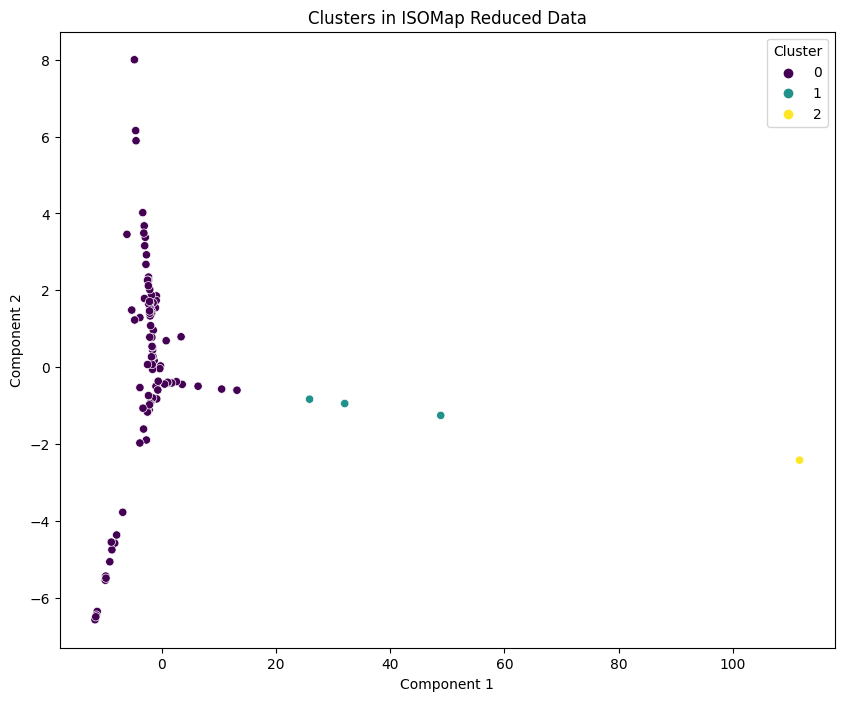

In [ ]:
# Applying K-Means Clustering with 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Adding the cluster labels to our reduced data DataFrame
reduced_data_df['Cluster'] = cluster_labels

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', data=reduced_data_df, palette='viridis')
plt.title('Clusters in ISOMap Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()
